## Аппроксимация МНК

Реализация примеров из книги Титова

In [1]:
import scipy.linalg
import numpy as np
from numpy import *
from scipy import optimize
import matplotlib.pyplot as plt

## Задание 2

3.1 Методом наименьших квадратов построить аппроксимирующую параболу y^m=c0+c1x+c2x^2 для функции, заданной в табличном виде:

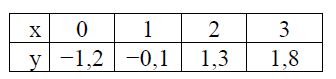

Значения коэффициентов:
c(0)=-1.2600000
c(1)=1.4900000
c(2)=-0.1500000
Уравнение кривой Ym=-1.260000+(1.490000)*x+(-0.150000)*x^2
Сумма площадей квадратов отклонений равна 0.072000


C:\Users\masik-saar\AppData\Local\Temp\ipykernel_13068\1528865635.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Сумма площадей квадратов отклонений равна %.6f" % v)


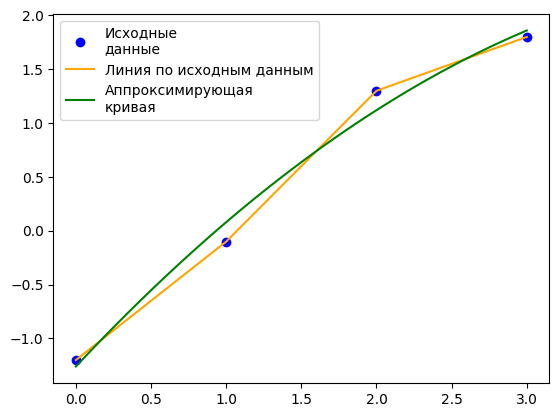

In [17]:
# Исходные данные (табличная функция)
x = np.array([0, 1, 2, 3])
y = np.array([-1.2, -0.1, 1.3, 1.8])

# Построение матрицы A для метода наименьших квадратов
A = x[:, np.newaxis] ** [0, 1, 2]

# Вычисление коэффициентов параболы методом наименьших квадратов
res = linalg.lstsq(A, y, rcond=None)

# Вывод коэффициентов на экран
print("Значения коэффициентов:")
for i in range(3):
    print("c(%i)=%.7f" % (i, res[0][i]))

# Извлечение коэффициентов параболы
a, b, c = res[0][0], res[0][1], res[0][2]

# Вывод уравнения аппроксимирующей параболы
print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a, b, c))

# Вычисление суммы квадратов откклонений (остатков)
v = res[1]

# Вывод суммы квадратов отклонений на экран
print("Сумма площадей квадратов отклонений равна %.6f" % v)

# Генерация значений для построения аппроксимирующей кривой
x_values = np.linspace(min(x), max(x), 100)
y_approx = a + b * x_values + c * x_values**2

# Построение графика исходных данных и аппроксимирующей кривой
plt.plot(x, y, 'bo', label="Исходные\nданные")
plt.plot(x, y, 'orange', label="Линия по исходным данным")
plt.plot(x_values, y_approx, label="Аппроксимирующая\nкривая", c='g')

# Добавление информации и отображение графика
plt.legend()
plt.show()

3.2 Методом наименьших квадратов определить коэффициенты аппроксимирующей кривой Y=c1x*cos(c2x)+c3 для таблично заданной функции:

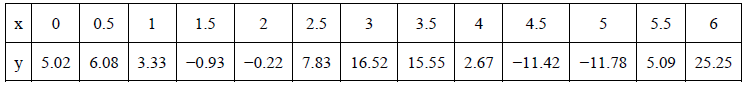

Коэффициенты подобранной зависимости:
a= 4.000196
b= 1.999998
c= 4.999244
Уравнение кривой Y=4.000196*x*cos(1.999998x)+4.999244
Сумма площадей квадратов отклонений равна 0.001124


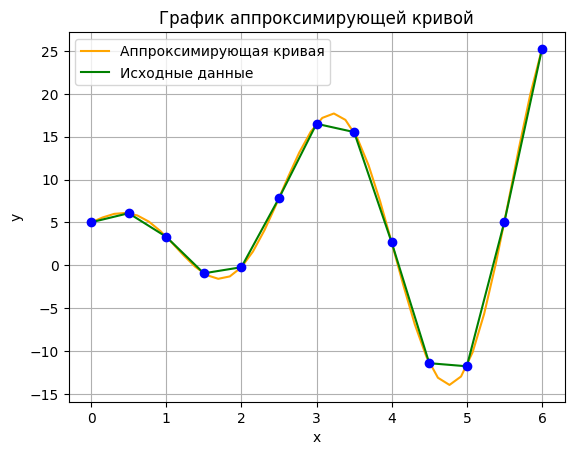

In [27]:
# задаем исходные данные x и y
x=np.linspace(0,6,13);
y=[5.02,6.08,3.33,-0.93,-0.22,7.83,16.52,15.55,
 2.67,-11.42,-11.78,5.09,25.25];
# задаем аппроксимирующую кривую как функцию аргумента х и трех искомых параметров a, b и c
def f(x, a, b, c):
 return a*x*np.cos(b*x)+c;
def g(x0):
 return y- f(x, *x0) # определяем функцию невязок
x0_init = (1,2,3) # задаем начальное приближение
# передаем в функцию leastsq требуемые параметры
x_opt, _ = optimize.leastsq(g, x0_init)
a, b, c =x_opt[0], x_opt[1], x_opt[2]
print("Коэффициенты подобранной зависимости:")
print("a= %.6f" % a)
print("b= %.6f" % b)
print("c= %.6f" % c)
print("Уравнение кривой Y=%.6f*x*cos(%.6fx)+%.6f" % (a,b,c))
v=np.sum((f(x, a, b, c)-y)**2)
print("Сумма площадей квадратов отклонений равна %.6f" % v)
x1=np.linspace(0,6,40) # задаем пределы значений х
# для построения графика полученной кривой
w=f(x1,a,b,c) # вычисляем
# значения полученной кривой в этих точках и строим график
plt.plot(x1,w,'orange')
plt.plot(x,y,'green')
plt.plot(x,y,'bo')
plt.title("График аппроксимирующей кривой") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid() # наносим на график сетку
plt.legend(('Аппроксимирующая кривая', 'Исходные данные')) # задаём описание для графика
plt.show()

## Задание 3 
Провести аппроксимацию МНК многочленами 1, 2 степени. Определить степень аппроксимации и построить соотвествующие графики
### Вариант 8:

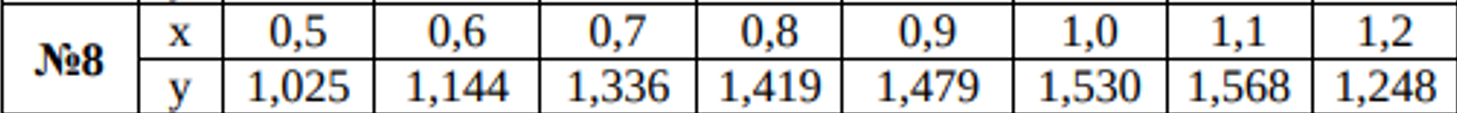

Значения коэффициентов для многочлена первой степени:
c(0)=0.9061786
c(1)=0.5146429
Уравнение кривой Ym=0.906179+(0.514643)*x
Сумма площадей квадратов отклонений равна 0.148422

Значения коэффициентов для многочлена второй степени:
c(0)=-0.8745060
c(1)=5.0327976
c(2)=-2.6577381
Уравнение кривой Ym=-0.874506+(5.032798)*x+(-2.657738)*x^2
Сумма площадей квадратов отклонений равна 0.029754


C:\Users\masik-saar\AppData\Local\Temp\ipykernel_13068\3565014700.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res1 = linalg.lstsq(A1, y)
C:\Users\masik-saar\AppData\Local\Temp\ipykernel_13068\3565014700.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Сумма площадей квадратов отклонений равна %.6f" % v1)
C:\Users\masik-saar\AppData\Local\Temp\ipykernel_13068\3565014700.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence t

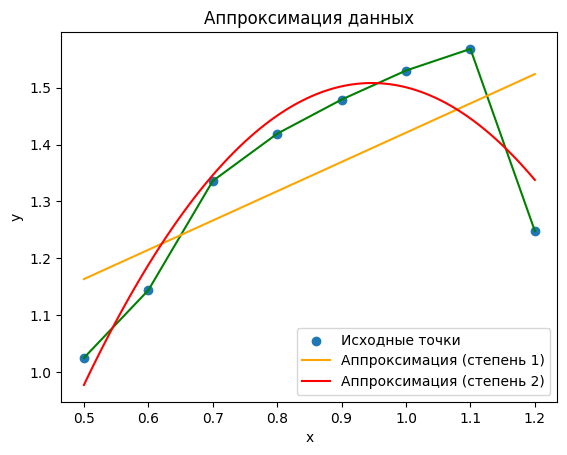

In [34]:
# Исходные данные
x = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
y = np.array([1.025, 1.144, 1.336, 1.419, 1.479, 1.530, 1.568, 1.248])
A1 = np.vstack([np.ones_like(x), x]).T
# Вычисление коэффициентов для многочлена первой степени
res1 = linalg.lstsq(A1, y)

# Вывод коэффициентов на экран
print("Значения коэффициентов для многочлена первой степени:")
for i in range(2):
    print("c(%i)=%.7f" % (i, res1[0][i]))

a1, b1 = res1[0][0], res1[0][1]
print("Уравнение кривой Ym=%.6f+(%.6f)*x" % (a1, b1))

v1 = res1[1]
print("Сумма площадей квадратов отклонений равна %.6f" % v1)

# Построение матрицы A для многочлена второй степени
A2 = np.vstack([np.ones_like(x), x, x**2]).T

# Вычисление коэффициентов для многочлена второй степени
res2 = linalg.lstsq(A2, y)

# Вывод коэффициентов на экран
print("\nЗначения коэффициентов для многочлена второй степени:")
for i in range(3):
    print("c(%i)=%.7f" % (i, res2[0][i]))

a2, b2, c2 = res2[0][0], res2[0][1], res2[0][2]
print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a2, b2, c2))

v2 = res2[1]
print("Сумма площадей квадратов отклонений равна %.6f" % v2)

# Генерация значений для построения графиков
x_vals = np.linspace(min(x), max(x), 100)
y_vals1 = a1 + b1 * x_vals
y_vals2 = a2 + b2 * x_vals + c2 * x_vals**2

# Построение графиков
plt.scatter(x, y, label="Исходные точки")
plt.plot(x, y, 'green')
plt.plot(x_vals, y_vals1, 'orange', label="Аппроксимация (степень 1)")
plt.plot(x_vals, y_vals2, 'red', label="Аппроксимация (степень 2)")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация данных')
plt.show()